In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
from tqdm.notebook import tqdm

In [13]:
# Read the Omega_m - Chi2 Table
omega_m_values, chi2 = np.load("chi2_values.npy")
interp_chi2 = interp1d(omega_m_values, -0.5*chi2, kind='linear')
interp_log_posterior=-0.5*chi2


In [14]:
def MCMC(x0,n_steps,x_min,x_max):

    chain= []
    acceptance= []
    log_post_chain= []

    chain.append(x0)
    acceptance.append(True)
    log_post_chain.append(interp_log_posterior(x0))

    for i in tqdm(range(n_steps)):
        x_try= np.random.uniform(x_min, x_max)
        f_try= interp_chi2(x_try)
        f_old= log_post_chain[-1]  #-1 è ultimo elemento della lista in python
        log_ratio= f_old - f_try
        log_u= np.log(np.random.uniform())

        if log_u < log_ratio:
            chain.append(x_try)
            log_post_chain.append(f_try)
            acceptance.append(True)
        else:
            chain.append(chain[-1])
            log_post_chain.append(log_post_chain[-1])
            acceptance.append(False)
    return chain, log_post_chain, acceptance


In [15]:
x_min=0.23
x_max=0.37
n_steps=100
x0=0.26

chain, log_post_chain, acceptance = MCMC(x0,n_steps,x_min,x_max)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
print("Acceptance : ", np.sum(acceptance))

Acceptance :  2


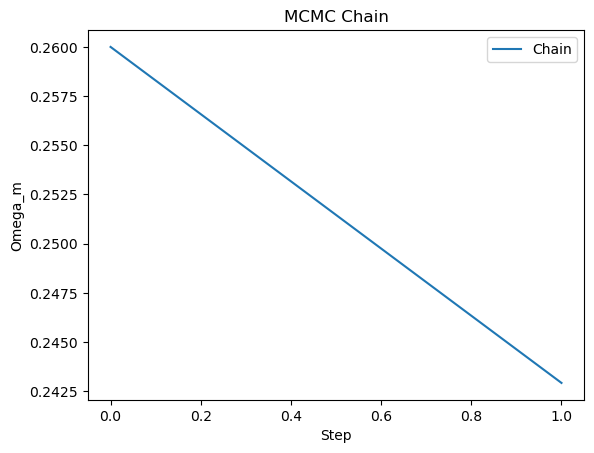

In [ ]:
plt.plot(range(len(chain)), chain, label="Chain")
plt.xlabel("Step")
plt.ylabel("Omega_m")
plt.title("MCMC Chain")
plt.legend()
plt.show()

dove è piatto è perchè non riesco a spostarmi per un pochino di tempo

In [ ]:
#scarto punti inziali
print("Scarto punti iniziali: ", np.mean(chain[:1000]), np.std(chain[:10]))

In [ ]:
chain_np_burn=chain[1000:]
steps=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
autocorrelation_time = []
chain1=chain_np_burn[:steps]
chain2=chain_np_burn[steps:]




